# 🤖 Chatbot Corporativo com Garantia de Verdade — Protótipo Técnico Auditável

Modelos generativos podem ser brilhantes
mas **a decisão pode ser artificial; a responsabilidade é real**.

Este notebook demonstra um **chatbot corporativo seguro**, que:

✅ Entende perguntas com IA de ponta  
✅ Responde **apenas com informação oficial**  
✅ Possui **política de decisão** para evitar erros e alucinações  
✅ Mantém rastreabilidade e conformidade com as regras do negócio  
✅ Opera com confiança mensurada e auditoria contínua

Quando a IA não souber ela **não inventa**. Ela pede confirmação ou recusa com elegância.

---

💡 *Show Me The Code!*

Este notebook entrega um MVP chatbot que **entende com IA** mas **responde com responsabilidade, verdade e governança**.




# ⚙️ 0. Instalação e imports

🔒 Hugging Face — Token de Acesso (Opcional)

Este projeto utiliza um modelo público do Hugging Face, portanto **NÃO** é necessário token para execução no Google Colab ou em ambientes com acesso direto ao Hub.

O token somente será necessário se:

- O modelo for alterado para acesso restrito

- O ambiente corporativo bloquear o download automático

- Caso for utilizado um modelo privado

Se necessário, o token pode ser obtido em:
https://huggingface.co/settings/tokens

Guias de referência:

https://huggingface.co/docs/hub/security-tokens

https://medium.com/@aroman11/how-to-use-hugging-face-api-token-in-python-for-ai-application-step-by-step-be0ed00d315c

https://pyimagesearch.com/2025/04/04/configure-your-hugging-face-access-token-in-colab-environment/

In [1]:
# ===========================================
# Instalação de dependências e importações
# ===========================================
# Se estiver no Colab, rode esta célula uma única vez:
!pip install -q sentence-transformers==2.7.0 umap-learn==0.5.5 faiss-cpu==1.12.0

# Versões estáveis (opcional, mas recomendado em auditorias)
!pip install -q umap-learn==0.5.5 scikit-learn==1.6.0

!pip install seaborn



import numpy as np
import json, math
import pandas as pd
from typing import List, Dict, Any, Tuple, Optional
from collections import defaultdict
from sentence_transformers import SentenceTransformer, util
from sklearn.manifold import TSNE
import umap  # umap-learn
import matplotlib.pyplot as plt
import seaborn as sns
import faiss



np.random.seed(42)



Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Versão Programador:
```
Python: 3.12.12
NumPy: 2.0.2
Pandas: 2.2.2
scikit-learn: 1.6.0
UMAP-learn: 0.5.5
FAISS: 1.12.0
Matplotlib: 3.10.0
Sentence-Transformers: 5.1.2

In [2]:
import sys, numpy as np, pandas as pd, sklearn, matplotlib, sentence_transformers

try:
    import umap
    umap_version = umap.__version__
except:
    umap_version = "Not Installed"

try:
    import faiss
    faiss_version = faiss.__version__ if hasattr(faiss, "__version__") else "N/A"
except:
    faiss_version = "Not Installed"

versions = {
    "Python": sys.version.split()[0],
    "NumPy": np.__version__,
    "Pandas": pd.__version__,
    "scikit-learn": sklearn.__version__,
    "UMAP-learn": umap_version,
    "FAISS": faiss_version,
    "Matplotlib": matplotlib.__version__,
    "Sentence-Transformers": sentence_transformers.__version__,
}

for k, v in versions.items():
    print(f"{k}: {v}")


Python: 3.9.16
NumPy: 1.26.4
Pandas: 2.1.4
scikit-learn: 1.6.0
UMAP-learn: 0.5.5
FAISS: 1.12.0
Matplotlib: 3.8.0
Sentence-Transformers: 2.7.0



# 📚 1. Dataset: Curadoria e Análise iniciais

Nesta etapa, estabelecemos o que é verdade oficial dentro do domínio.

**Todo o conteúdo utilizado pela IA passa por curadoria prévia**, garantindo que:

- Não haja contradições ou informações obsoletas

- Cada pergunta esteja vinculada ao seu tópico de negócio

- Toda resposta tenha origem verificável e auditável

A base é então carregada e convertida para um formato estruturado, permitindo:

1. Auditoria completa e rastreável

2. Evolução contínua do conhecimento

3. Governança e versionamento seguro

✅ Aqui o modelo ainda não pode responder nada — apenas aprende o que é permitido saber.


### 📚 1.1 — Base Canônica — Conhecimento Oficial do Negócio

Nesta etapa, consolidamos todo o conteúdo autorizado pelo negócio em um formato único, simples e verificável.
Cada entrada segue um padrão obrigatório:

- topic: o contexto do assunto

- question: como o usuário formula a dúvida

- answer: a resposta oficial, aprovada pelo negócio

Esse catálogo estruturado representa a verdade auditável do domínio.
A IA não inventa conteúdo: ela só pode responder a partir desta base, garantindo alinhamento com regras internas, conformidade legal (incluindo LGPD) e precisão de comunicação com o usuário final.

**Contexto do Domínio — Recrutamento e Seleção (TechHire)**

A base canônica utilizada neste projeto representa o **conhecimento oficial**
de um **portal corporativo de carreiras**, abrangendo informações verificadas e
padronizadas sobre todas as etapas da jornada do candidato:

• 📌 **Elegibilidade** — quem pode se candidatar e quais documentos são exigidos  
• 📝 **Currículo** — formatos, envio, atualização e orientações de confecção  
• 🔐 **Cadastro e Acesso** — criação de conta, login, validação e segurança  
• 🏳️‍🌈 **Inclusão** — vagas PCD, acessibilidade e ações afirmativas  
• 💼 **Vagas** — filtros, modalidades (remoto/presencial) e condições gerais  
• 🎯 **Seleção** — etapas, prazos, entrevistas, testes e acompanhamento  
• 🎓 **Programas** — estágio e jovem aprendiz, critérios e benefícios  
• 🎁 **Benefícios** — políticas gerais e onboarding de novos colaboradores  
• 🛡️ **Privacidade** — tratamento LGPD e gestão de consentimento  
• 🤝 **Suporte** — canais oficiais para dúvidas e incidentes no portal

Este domínio envolve **respostas sensíveis** que devem refletir fielmente as políticas
e regras internas da empresa — sem improviso, sem especulação e sem geração livre
de conteúdo.

➡️ Essa é a **fonte de verdade corporativa** que orienta o sistema a responder
**somente o que é oficialmente permitido** pelo negócio.

In [3]:
knowledge_base_recrutamento = """
[
    {
        "topic": "Elegibilidade",
        "question": "Quais documentos preciso para me candidatar?",
        "answer": "RG ou CNH, CPF, comprovante de residência e currículo atualizado em PDF."
    },
    {
        "topic": "Elegibilidade",
        "question": "Quem pode se candidatar às vagas?",
        "answer": "Qualquer pessoa maior de 18 anos com CPF válido. Estrangeiros podem usar RNE ou Passaporte."
    },
    {
        "topic": "Elegibilidade",
        "question": "Preciso ter experiência profissional para me candidatar?",
        "answer": "Não necessariamente. Algumas vagas são para iniciantes e não exigem experiência prévia."
    },
    {
        "topic": "Elegibilidade",
        "question": "Posso me candidatar se ainda estiver na escola?",
        "answer": "Sim, desde que tenha 16 anos ou mais e apresente documento de autorização para vagas de Jovem Aprendiz."
    },
    {
        "topic": "Elegibilidade",
        "question": "Sou estrangeiro, posso participar do processo?",
        "answer": "Sim. Estrangeiros com RNE ou Passaporte válido podem se candidatar."
    },
    {
        "topic": "Elegibilidade",
        "question": "Preciso de certificado militar para me candidatar?",
        "answer": "Homens entre 18 e 45 anos precisam comprovar regularidade com o serviço militar."
    },
    {
        "topic": "Elegibilidade",
        "question": "É necessário ter título de eleitor para participar?",
        "answer": "Sim, para maiores de 18 anos é exigida quitação eleitoral."
    },
    {
        "topic": "Currículo",
        "question": "Quais arquivos são aceitos para currículo?",
        "answer": "Aceitamos apenas PDF de até 3 MB."
    },
    {
        "topic": "Currículo",
        "question": "Como faço para enviar meu currículo?",
        "answer": "Acesse o Portal TechHire → Área do Candidato → Enviar Currículo e selecione o arquivo PDF."
    },
    {
        "topic": "Cadastro",
        "question": "Posso me inscrever sem cadastro na plataforma?",
        "answer": "Não. É necessário criar uma conta para acompanhar o processo."
    },
    {
        "topic": "Cadastro",
        "question": "Como posso criar uma conta na TechHire?",
        "answer": "Na página inicial, clique em 'Criar Conta', informe seus dados e confirme pelo e-mail enviado."
    },
    {
        "topic": "Cadastro",
        "question": "Esqueci minha senha, como recupero?",
        "answer": "Clique em 'Esqueci minha senha', informe seu e-mail e siga as instruções para redefinição."
    },
    {
        "topic": "Currículo",
        "question": "Posso editar meu currículo após enviar?",
        "answer": "Sim, é possível substituir o arquivo na Área do Candidato antes do término da triagem."
    },
    {
        "topic": "Inclusão",
        "question": "Tenho deficiência, existem vagas PCD?",
        "answer": "Sim. Vagas exclusivas ou afirmativas podem ser encontradas marcando o filtro 'PCD' das oportunidades."
    },
    {
        "topic": "Currículo",
        "question": "Existe suporte para criação do currículo?",
        "answer": "Sim, oferecemos um modelo de currículo e dicas na seção 'Orientações ao Candidato'."
    },
    {
        "topic": "Elegibilidade",
        "question": "Posso me candidatar a mais de uma vaga?",
        "answer": "Sim, desde que o seu perfil atenda aos requisitos de cada oportunidade."
    },
    {
        "topic": "Vagas",
        "question": "Como funcionam os filtros de vagas?",
        "answer": "Use os filtros por área, localidade, tipo de contrato e nível de experiência."
    },
    {
        "topic": "Vagas",
        "question": "Vocês oferecem oportunidades remotas?",
        "answer": "Sim, algumas vagas são totalmente remotas e indicadas como 'Home Office'."
    },
    {
        "topic": "Seleção",
        "question": "Posso cancelar minha candidatura?",
        "answer": "Sim, na Área do Candidato selecione a candidatura e clique em 'Cancelar'."
    },
    {
        "topic": "Seleção",
        "question": "Como funciona o processo seletivo?",
        "answer": "Triagem curricular, teste técnico e entrevista com gestores."
    },
    {
        "topic": "Seleção",
        "question": "O processo seletivo tem prova técnica?",
        "answer": "Sim, dependendo da vaga haverá teste técnico ou estudo de caso."
    },
    {
        "topic": "Seleção",
        "question": "Como saberei se fui aprovado na triagem?",
        "answer": "Você receberá notificação por e-mail e na Área do Candidato."
    },
    {
        "topic": "Seleção",
        "question": "Quanto tempo leva o retorno da candidatura?",
        "answer": "O prazo médio é de 7 dias úteis após o envio."
    },
    {
        "topic": "Seleção",
        "question": "Recebo feedback se não for aprovado?",
        "answer": "Sim, você receberá um feedback resumido por e-mail."
    },
    {
        "topic": "Seleção",
        "question": "A entrevista é presencial ou online?",
        "answer": "Depende da vaga. O formato será informado na convocação."
    },
    {
        "topic": "Seleção",
        "question": "É possível remarcar entrevista?",
        "answer": "Sim, desde que informado com no mínimo 24 horas de antecedência."
    },
    {
        "topic": "Seleção",
        "question": "Existe ajuda de custos para entrevistas presenciais?",
        "answer": "Para candidatos fora da cidade, avaliamos reembolso mediante autorização prévia."
    },
    {
        "topic": "Seleção",
        "question": "Como acompanhar o status da minha candidatura?",
        "answer": "Na Área do Candidato, em 'Minhas Candidaturas'."
    },
    {
        "topic": "Programas",
        "question": "Vocês contratam estagiários?",
        "answer": "Sim, para estudantes com matrícula ativa em curso técnico ou superior."
    },
    {
        "topic": "Programas",
        "question": "Vocês contratam jovens aprendizes?",
        "answer": "Sim, para candidatos entre 14 e 24 anos em situação de aprendizagem."
    },
    {
        "topic": "Inclusão",
        "question": "Existe política de diversidade?",
        "answer": "Sim, temos compromisso com inclusão e diversidade em todos os processos."
    },
    {
        "topic": "Vagas",
        "question": "Posso trabalhar de outro estado?",
        "answer": "Sim, para vagas remotas. Para vagas presenciais é necessário residir na região."
    },
    {
        "topic": "Cadastro",
        "question": "Posso atualizar meus dados cadastrais?",
        "answer": "Sim. Acesse 'Perfil > Meus Dados' e salve as alterações."
    },
    {
        "topic": "Currículo",
        "question": "Como fazer inclusão de portfólio?",
        "answer": "Inclua o link do seu portfólio no campo específico da candidatura."
    },
    {
        "topic": "Currículo",
        "question": "Aceitam LinkedIn como currículo?",
        "answer": "O LinkedIn pode ser anexado como link complementar, mas o currículo PDF continua obrigatório."
    },
    {
        "topic": "Elegibilidade",
        "question": "Preciso ter CNH?",
        "answer": "A CNH só é exigida em vagas que envolvam deslocamentos ou veículos."
    },
    {
        "topic": "Benefícios",
        "question": "Vocês oferecem treinamento para novos colaboradores?",
        "answer": "Sim, todas as contratações passam por onboarding e treinamento inicial."
    },
    {
        "topic": "Programas",
        "question": "Qual o modelo de contrato das vagas?",
        "answer": "Podem ser CLT, estágio, jovem aprendiz ou PJ, conforme especificado na vaga."
    },
    {
        "topic": "Benefícios",
        "question": "Quais benefícios são oferecidos?",
        "answer": "Benefícios variam conforme a vaga, mas geralmente incluem plano de saúde, VR e auxílio home office."
    },
    {
        "topic": "Seleção",
        "question": "Recebo comprovante de participação?",
        "answer": "Sim, mediante solicitação na Área do Candidato."
    },
    {
        "topic": "Privacidade",
        "question": "Meus dados são protegidos pela LGPD?",
        "answer": "Sim. Todos os dados são tratados conforme a Lei Geral de Proteção de Dados."
    },
    {
        "topic": "Privacidade",
        "question": "Posso solicitar exclusão dos meus dados?",
        "answer": "Sim. A solicitação deve ser feita pela seção 'Privacidade e Dados' no portal."
    },
    {
        "topic": "Vagas",
        "question": "Onde vejo as vagas disponíveis?",
        "answer": "Na página 'Vagas', filtrando por área e localização."
    },
    {
        "topic": "Seleção",
        "question": "Existe alguma taxa para participar do processo seletivo?",
        "answer": "Não. Todo o processo é gratuito."
    },
    {
        "topic": "Suporte",
        "question": "Como entro em contato com o suporte?",
        "answer": "Envie e-mail para suporte@techhire.com ou acesse a seção Ajuda e Suporte no portal."
    },
    {
        "topic": "Vagas",
        "question": "Vocês avisam quando surgem novas vagas?",
        "answer": "Sim, é possível ativar notificações de oportunidades no seu perfil."
    },
    {
        "topic": "Currículo",
        "question": "Como sei se meu currículo foi enviado com sucesso?",
        "answer": "Uma notificação aparecerá na tela e será enviado e-mail de confirmação."
    },
    {
        "topic": "Inclusão",
        "question": "Sou PCD. Preciso anexar laudo médico?",
        "answer": "Sim, o laudo é necessário para vagas destinadas a PcD."
    },
    {
        "topic": "Privacidade",
        "question": "Existe política de confidencialidade dos dados?",
        "answer": "Sim, a TechHire possui política de privacidade e confidencialidade disponível no portal."
    },
    {
        "topic": "Elegibilidade",
        "question": "Preciso ter ensino médio completo para me candidatar?",
        "answer": "Não para todas as vagas. O requisito escolar é definido por cada oportunidade."
    },
    {
        "topic": "Elegibilidade",
        "question": "Estar desempregado é obrigatório para participar?",
        "answer": "Não. Pessoas empregadas também podem se candidatar."
    },
    {
        "topic": "Elegibilidade",
        "question": "Candidatos menores de idade precisam de autorização dos responsáveis?",
        "answer": "Sim, para vagas de Jovem Aprendiz é exigida autorização formal."
    },
    {
        "topic": "Elegibilidade",
        "question": "Quem está com CPF pendente pode participar?",
        "answer": "Não. É necessário regularizar a situação antes do cadastro."
    },
    {
        "topic": "Elegibilidade",
        "question": "Posso me candidatar se não tiver comprovante de residência no meu nome?",
        "answer": "Sim, são aceitos comprovantes em nome de familiares do mesmo endereço."
    },
    {
        "topic": "Elegibilidade",
        "question": "Gestantes podem participar do processo seletivo?",
        "answer": "Sim, sem qualquer tipo de restrição."
    },
    {
        "topic": "Elegibilidade",
        "question": "Preciso falar inglês?",
        "answer": "Apenas para vagas que exigem idioma nas qualificações."
    },
    {
        "topic": "Elegibilidade",
        "question": "Existe limite máximo de idade para candidatura?",
        "answer": "Não há limite de idade, exceto para programas específicos como Jovem Aprendiz."
    },
    {
        "topic": "Currículo",
        "question": "O currículo precisa seguir algum modelo específico?",
        "answer": "Não é obrigatório, mas recomendamos utilizar o modelo disponível na plataforma."
    },
    {
        "topic": "Currículo",
        "question": "Posso incluir foto no currículo?",
        "answer": "Sim, desde que profissional e recente."
    },
    {
        "topic": "Currículo",
        "question": "Qual o tamanho mínimo de arquivo aceito?",
        "answer": "O sistema aceita qualquer PDF até 3 MB, sem tamanho mínimo obrigatório."
    },
    {
        "topic": "Currículo",
        "question": "Posso enviar certificados junto com o currículo?",
        "answer": "Certificados podem ser anexados em sessão específica da plataforma."
    },
    {
        "topic": "Currículo",
        "question": "Posso ocultar informações como CPF no currículo?",
        "answer": "Sim. Dados pessoais sensíveis não são necessários no arquivo."
    },
    {
        "topic": "Currículo",
        "question": "Posso enviar um currículo em inglês?",
        "answer": "Sim. O idioma não impede a análise."
    },
    {
        "topic": "Currículo",
        "question": "O currículo deve conter assinatura?",
        "answer": "Não, assinaturas não são exigidas em currículos digitais."
    },
    {
        "topic": "Cadastro",
        "question": "Quanto tempo leva para validar meu cadastro?",
        "answer": "A validação é imediata após a confirmação do e-mail."
    },
    {
        "topic": "Cadastro",
        "question": "Não recebi o e-mail de confirmação. O que fazer?",
        "answer": "Verifique a caixa de spam ou reenvie o link pela página de login."
    },
    {
        "topic": "Cadastro",
        "question": "Posso alterar o e-mail do meu cadastro?",
        "answer": "Sim. Basta acessar “Perfil → Segurança da Conta”."
    },
    {
        "topic": "Cadastro",
        "question": "Existe limite para tentativas de login?",
        "answer": "Sim. Após várias tentativas incorretas, a conta é temporariamente bloqueada por segurança."
    },
    {
        "topic": "Cadastro",
        "question": "Posso usar redes sociais para criar conta?",
        "answer": "Sim, quando disponível, é possível criar conta com Google ou LinkedIn."
    },
    {
        "topic": "Inclusão",
        "question": "Existe acessibilidade para leitores de tela?",
        "answer": "Sim, a plataforma segue diretrizes de acessibilidade digital (WCAG)."
    },
    {
        "topic": "Inclusão",
        "question": "O atendimento possui suporte em Libras?",
        "answer": "Sim, mediante agendamento prévio para entrevistas virtuais."
    },
    {
        "topic": "Inclusão",
        "question": "Há vagas para grupos afirmativos específicos?",
        "answer": "Sim, oportunidades exclusivas podem contemplar diversidade, gênero e raça."
    },
    {
        "topic": "Inclusão",
        "question": "Posso pedir adaptações no processo seletivo?",
        "answer": "Sim. Basta registrar a necessidade ao confirmar sua participação."
    },
    {
        "topic": "Vagas",
        "question": "As vagas presenciais oferecem auxílio mudança?",
        "answer": "Pode ser oferecido mediante política da contratante e aprovação prévia."
    },
    {
        "topic": "Vagas",
        "question": "As vagas têm carga horária fixa?",
        "answer": "A carga horária é informada na descrição da vaga."
    },
    {
        "topic": "Vagas",
        "question": "Há oportunidades para trabalho aos finais de semana?",
        "answer": "Sim, quando previsto no perfil da função."
    },
    {
        "topic": "Vagas",
        "question": "Como saber se a vaga ainda está aberta?",
        "answer": "Se a vaga estiver visível no portal, ela ainda aceita candidaturas."
    },
    {
        "topic": "Vagas",
        "question": "Posso indicar uma vaga para outra pessoa?",
        "answer": "Sim, pelo botão “Compartilhar” na página da vaga."
    },
    {
        "topic": "Vagas",
        "question": "Posso me candidatar novamente à mesma vaga futuramente?",
        "answer": "Sim, caso um novo processo seja aberto."
    },
    {
        "topic": "Vagas",
        "question": "Existe limite de vagas por área?",
        "answer": "O número de vagas é definido conforme necessidade da contratante."
    },
    {
        "topic": "Seleção",
        "question": "O teste técnico é feito online?",
        "answer": "Geralmente sim, com prazo de conclusão definido."
    },
    {
        "topic": "Seleção",
        "question": "Caso não passe em uma etapa, posso tentar novamente?",
        "answer": "Sim, em futuros processos seletivos."
    },
    {
        "topic": "Seleção",
        "question": "Posso solicitar correção do teste técnico?",
        "answer": "Não. As avaliações não são revisadas individualmente."
    },
    {
        "topic": "Seleção",
        "question": "Posso acompanhar a classificação do meu teste?",
        "answer": "Não há ranking público. Apenas o status da candidatura fica disponível."
    },
    {
        "topic": "Seleção",
        "question": "Há entrevista com RH e com área técnica?",
        "answer": "Sim, conforme o nível da vaga."
    },
    {
        "topic": "Seleção",
        "question": "O teste psicológico faz parte do processo?",
        "answer": "Apenas para vagas que exigem essa avaliação."
    },
    {
        "topic": "Seleção",
        "question": "É necessário apresentar documentos na entrevista?",
        "answer": "Sim. O recrutador informará quais são necessários."
    },
    {
        "topic": "Seleção",
        "question": "Quantas etapas tem o processo?",
        "answer": "O número varia de acordo com o tipo de vaga."
    },
    {
        "topic": "Seleção",
        "question": "O processo pode ser cancelado pela empresa?",
        "answer": "Sim, em casos de reorganização interna ou mudanças de planejamento."
    },
    {
        "topic": "Seleção",
        "question": "Posso solicitar informações sobre desempenho na entrevista?",
        "answer": "Feedback detalhado pode não estar disponível, dependendo da vaga."
    },
    {
        "topic": "Programas",
        "question": "Há limite de horas para estágio?",
        "answer": "Sim, máximo de 6 horas diárias ou 30 semanais."
    },
    {
        "topic": "Programas",
        "question": "Jovens aprendizes podem ter jornada remota?",
        "answer": "Apenas quando autorizado pelo programa e legislação."
    },
    {
        "topic": "Programas",
        "question": "Programas de estágio incluem bolsa-auxílio?",
        "answer": "Sim. O valor é especificado em cada oportunidade."
    },
    {
        "topic": "Benefícios",
        "question": "Existe auxílio transporte para trabalho presencial?",
        "answer": "Sim, conforme política interna da contratante."
    },
    {
        "topic": "Benefícios",
        "question": "Home office oferece mobiliário ou equipamentos?",
        "answer": "Pode haver fornecimento de itens ou auxílio financeiro."
    },
    {
        "topic": "Benefícios",
        "question": "Os benefícios são os mesmos para todos os cargos?",
        "answer": "Não. Os benefícios podem variar por área, contrato e unidade."
    },
    {
        "topic": "Privacidade",
        "question": "Meus dados podem ser usados para outras seleções?",
        "answer": "Sim, com seu consentimento na plataforma."
    },
    {
        "topic": "Privacidade",
        "question": "Por quanto tempo meus dados ficam armazenados?",
        "answer": "O prazo segue normas legais ou até você solicitar exclusão."
    },
    {
        "topic": "Suporte",
        "question": "Existe suporte para problemas na entrevista online?",
        "answer": "Sim. Um canal de atendimento é informado no convite da entrevista."
    },
    {
        "topic": "Suporte",
        "question": "Existe outro tipo de canal para duvidas?",
        "answer": "Sim. pode entrar em contato com pelo telefone (55) 2222-3456."
    }
]
"""


### 📚 1.2 — Saneamento e Padronização da Base



Nesta etapa, convertemos o conteúdo JSON em uma estrutura manipulável e removemos duplicidades para garantir que cada pergunta tenha uma única resposta oficial.
Esse saneamento evita inconsistências semânticas, divergências operacionais e problemas futuros no treinamento de embeddings.
Após a limpeza, a versão oficial e padronizada da Base Canônica é salva com formatação adequada para auditoria e versionamento.

In [4]:
# Converte o conteúdo JSON em string (ex.: proveniente de um input ou variável)
# para uma estrutura Python manipulável (lista de dicionários)
data = json.loads(knowledge_base_recrutamento)


# Controle para detectar perguntas repetidas, garantindo 1 resposta por pergunta
seen = set()         # Armazena as perguntas já encontradas
unique_data = []     # Nova lista apenas com perguntas únicas

# Varre cada item da base para eliminar duplicatas
for item in data:
    # Verifica se a pergunta já foi registrada anteriormente
    if item["question"] not in seen:
        unique_data.append(item)  # Adiciona no conjunto final
        seen.add(item["question"])  # Marca a pergunta como já vista

# Exibe estatísticas da limpeza para auditoria
print(f"Registros antes: {len(data)}")
print(f"Registros após remover duplicatas: {len(unique_data)}")

# Salva a base final validada como JSON formatado:
# - UTF-8 para compatibilidade com PT-BR
# - ensure_ascii=False mantém acentos corretamente
# - indent=2 facilita leitura e versionamento
with open("knowledge_base_recrutamento.json", "w", encoding="utf-8") as f:
    json.dump(unique_data, f, ensure_ascii=False, indent=2)

# Confirmação final da operação
print("✅ Arquivo salvo corretamente como knowledge_base_recrutamento.json")


Registros antes: 100
Registros após remover duplicatas: 100
✅ Arquivo salvo corretamente como knowledge_base_recrutamento.json


### 📚 1.3 — Validação Estrutural da Base Canônica

Nesta etapa, aplicamos uma verificação formal para garantir que a Base Canônica esteja pronta e segura para ser consumida pela IA.
O objetivo é assegurar que o arquivo JSON segue rigorosamente o padrão definido pelo negócio:

-  Estrutura obrigatória como lista de registros
-  Todos os itens possuem os campos topic, question e answer
-  Todos os valores são strings, compatíveis com o modelo semântico
-  Erros são detectados antes do uso em produção

Caso qualquer inconsistência seja encontrada, a validação é interrompida imediatamente com uma mensagem precisa sobre o problema — prevenindo falhas de inferência, respostas incorretas ou até mesmo alucinações do modelo.

In [5]:
def validate_kb_json(json_path: str) -> List[Dict[str, str]]:
    """
    Função de GOVERNANÇA da Base Canônica.

    Ela verifica se o JSON de conhecimento está consistente e seguro para ser usado pela IA.
    Em resumo, confirma que:
    ✅ O arquivo existe e é JSON válido
    ✅ O conteúdo é uma LISTA de itens (cada item = pergunta/ resposta oficial)
    ✅ Cada item contém os campos obrigatórios:
        - topic
        - question
        - answer
    ✅ Todos estes campos são strings (compatíveis com embeddings e busca semântica)

    Se houver qualquer erro:
    ❌ A execução é interrompida com uma mensagem clara de onde está o problema

    Se estiver tudo certo:
    ✅ O arquivo é carregado e retornado para uso seguro no pipeline
    """

    # Tenta abrir o arquivo JSON e converter para objeto Python
    try:
        with open(json_path, "r", encoding="utf-8") as f:
            data = json.load(f)

    except Exception as e:
        # Falha ao abrir ou ler o JSON → interrompe com erro descritivo
        raise ValueError(f"❌ JSON inválido ou não pode ser carregado: {e}")

    # A base deve ser uma LISTA (conjunto de registros canônicos)
    if not isinstance(data, list):
        raise ValueError("❌ A base deve ser uma lista de entradas JSON.")

    # Campos obrigatórios para cada item do conhecimento oficial
    required_fields = {"topic", "question", "answer"}

    # Validação linha por linha (item a item)
    for i, item in enumerate(data):

        # Cada item deve ser um objeto JSON (dicionário)
        if not isinstance(item, dict):
            raise ValueError(f"❌ Item {i} não é um objeto JSON.")

        # Verifica se os três campos existem
        missing = required_fields - set(item.keys())
        if missing:
            raise ValueError(f"❌ Item {i} está faltando os campos: {missing}")

        # Verifica se os campos são strings (requisito da IA para embeddings)
        for field in required_fields:
            if not isinstance(item[field], str):
                raise ValueError(
                    f"❌ Item {i}: campo '{field}' deve ser string, mas recebeu {type(item[field])}"
                )

    # Se chegar até aqui → tudo está correto
    print(f"✅ JSON válido! Registros: {len(data)}")
    return data


# Valida automaticamente o arquivo antes de alimentar o pipeline de IA
KB = validate_kb_json("knowledge_base_recrutamento.json")


✅ JSON válido! Registros: 100


### 📚 1.4 — Carregamento e Inspeção Inicial da Base Canônica

Após a validação estrutural, carregamos a versão oficial da Base Canônica para o ambiente de análise.
Nesta etapa:

- Abrimos o arquivo curado e validado
- Convertamos seu conteúdo para um DataFrame do pandas
- Realizamos uma inspeção rápida das primeiras entradas
- Registramos o volume final de itens disponíveis

O propósito é garantir visibilidade imediata da estrutura e permitir auditoria humana antes de seguir para o processamento semântico.
Assim, estabelecemos um checkpoint de governança entre a preparação do conhecimento e o início da inteligência da solução.

In [6]:
# Abre o arquivo oficial da Base Canônica e carrega seu conteúdo como objeto Python
# encoding="utf-8" garante compatibilidade com acentos e caracteres do idioma
with open("knowledge_base_recrutamento.json", "r", encoding="utf-8") as f:
    KB: List[Dict[str, str]] = json.load(f)  # Espera-se uma lista de registros (topic/question/answer)

# Converte a lista de dicionários em um DataFrame do pandas
# Essa estrutura facilita análise, auditoria visual e pré-processamento
df_kb = pd.DataFrame(KB)

# Informa ao leitor quantos registros válidos existem após o carregamento
print("Registros:", len(df_kb))

# Exibe as 5 primeiras linhas da base
# Objetivo: inspeção rápida da estrutura antes de aplicar modelos semânticos
display(df_kb.head())



Registros: 100


,topic,question,answer
0,Elegibilidade,Quais documentos preciso para me candidatar?,"RG ou CNH, CPF, comprovante de residência e cu..."
1,Elegibilidade,Quem pode se candidatar às vagas?,Qualquer pessoa maior de 18 anos com CPF válid...
2,Elegibilidade,Preciso ter experiência profissional para me c...,Não necessariamente. Algumas vagas são para in...
3,Elegibilidade,Posso me candidatar se ainda estiver na escola?,"Sim, desde que tenha 16 anos ou mais e apresen..."
4,Elegibilidade,"Sou estrangeiro, posso participar do processo?",Sim. Estrangeiros com RNE ou Passaporte válido...


# 🏗️ 2. Representação Semântica e Indexação Vetorial

Com o conhecimento oficial carregado, criamos uma representação vetorial do significado das perguntas, o que permite comparar intenção e contexto sem depender de palavras exatas.

Utilizamos:

- Modelo SBERT multilíngue para embeddings estáveis e robustos

- Índice FAISS para busca altamente eficiente

Isso garante que perguntas diferentes com o mesmo sentido sejam reconhecidas como semelhantes.
A partir deste momento, a IA passa a “compreender” o domínio, pois:

- ✅ Perguntas com sinônimos, variações ou erros continuam sendo encontradas
- ✅ Similaridade é guiada por significado — não por palavras exatas

Ainda assim, nenhuma resposta é produzida automaticamente:

📌 A IA só propõe candidatos — a decisão virá no próximo passo.

### 🏗️ 2.1 — Carregamento da Base Canônica e Extração de Embeddings

In [7]:
# Tente ler a partir de uma variável de string JSON já existente
KB = None
try:
    # Tenta desserializar a variável em memória (útil em notebooks/pipelines onde o JSON já foi carregado)
    KB = json.loads(knowledge_base_recrutamento)  # se a variável existir no ambiente
except Exception:
    # Fallback: caso a variável não exista ou o conteúdo não seja JSON válido, lê do arquivo em disco
    with open("knowledge_base_recrutamento.json", "r", encoding="utf-8") as f:
        KB = json.load(f)

# Validação mínima
# Garante que KB é uma lista não vazia (formato esperado para a base canônica)
assert isinstance(KB, list) and len(KB) > 0, "Base KB está vazia ou mal formatada."

# Constrói DataFrame apenas com as colunas canônicas (topic/question/answer) para análises e auditoria
df = pd.DataFrame(KB)[["topic", "question", "answer"]].copy()

# Cria um identificador numérico estável por linha (facilita rastreabilidade e merges)
df["qid"] = np.arange(len(df))

# Relatório rápido de volume de dados para registro/auditoria
print("Registros:", len(df))

# Amostra das 5 primeiras linhas para inspeção visual (estrutura e conteúdo)
display(df.head(5))

# Modelo de sentenças (multilíngue; bom trade-off para bases de ~50–100 perguntas)
MODEL_NAME = "sentence-transformers/paraphrase-multilingual-mpnet-base-v2"

# Inicializa o codificador de sentenças (carrega pesos; pode demandar rede/tempo na primeira execução)
encoder = SentenceTransformer(MODEL_NAME)

# Gera embeddings das perguntas canônicas
q_embeddings = encoder.encode(
    df["question"].tolist(),  # lista de perguntas fonte
    batch_size=32,            # tamanho de lote (ajuste conforme memória/latência)
    show_progress_bar=True,   # barra de progresso para visibilidade do processo
    normalize_embeddings=True # normalização L2 → produto interno equivale ao cosseno (comparações consistentes)
).astype("float32")           # reduz precisão para float32 (economia de memória/CPU sem perda relevante)

# Confirma a dimensão do tensor resultante (N_perguntas x D_emb)
print("Embeddings:", q_embeddings.shape)


Registros: 100


,topic,question,answer,qid
0,Elegibilidade,Quais documentos preciso para me candidatar?,"RG ou CNH, CPF, comprovante de residência e cu...",0
1,Elegibilidade,Quem pode se candidatar às vagas?,Qualquer pessoa maior de 18 anos com CPF válid...,1
2,Elegibilidade,Preciso ter experiência profissional para me c...,Não necessariamente. Algumas vagas são para in...,2
3,Elegibilidade,Posso me candidatar se ainda estiver na escola?,"Sim, desde que tenha 16 anos ou mais e apresen...",3
4,Elegibilidade,"Sou estrangeiro, posso participar do processo?",Sim. Estrangeiros com RNE ou Passaporte válido...,4


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Embeddings: (100, 768)


### 🏗️ 2.2 — Indexação e Persistência dos Artefatos

In [8]:
# ===========================================
# 2.2 — Indexação das Perguntas (persistir artefatos)
# Pré-requisitos nesta sessão:
#   - df: DataFrame com colunas ["topic","question","answer","qid"]
#   - q_embeddings: np.ndarray (N x D), normalizada e dtype float32
# Objetivo:
#   - Persistir embeddings e linhas canônicas para reuso em consultas
# Artefatos:
#   - artefatos/kb_questions.npy
#   - artefatos/kb_rows.json
# ===========================================
import json, numpy as np, pandas as pd
from pathlib import Path

# Validações mínimas
assert {"topic","question","answer","qid"}.issubset(df.columns), "df precisa ter topic/question/answer/qid."
assert isinstance(q_embeddings, np.ndarray) and q_embeddings.ndim == 2, "q_embeddings inválido."

# Cria pasta de artefatos
Path("artefatos").mkdir(exist_ok=True)

# 1) Salva embeddings
np.save("artefatos/kb_questions.npy", q_embeddings)

# 2) Salva linhas canônicas
df[["qid","topic","question","answer"]].to_json(
    "artefatos/kb_rows.json",
    orient="records",
    force_ascii=False,
    indent=2
)

print("✅ Indexação persistida.")
print("Perguntas:", len(df))
print("Embeddings:", q_embeddings.shape, q_embeddings.dtype)
print("Arquivos: artefatos/kb_questions.npy | artefatos/kb_rows.json")


✅ Indexação persistida.
Perguntas: 100
Embeddings: (100, 768) float32
Arquivos: artefatos/kb_questions.npy | artefatos/kb_rows.json


### 🏗️ 2.3 — Índice Semântico FAISS

*Nota técnica:* O uso de FAISS permite indexação vetorial eficiente e
busca aproximada para grandes volumes de dados. Como as embeddings são
normalizadas, o produto interno representa a similaridade do cosseno.


In [9]:
# ===========================================
# 2.3 — Índice Semântico FAISS (kNN por Cosseno)
# ===========================================

MODEL_NAME = "sentence-transformers/paraphrase-multilingual-mpnet-base-v2"
encoder = SentenceTransformer(MODEL_NAME)

# Geração das embeddings normalizadas (cosine ≈ inner product)
q_embeddings = encoder.encode(
    df["question"].tolist(),
    batch_size=32,
    show_progress_bar=True,
    normalize_embeddings=True
).astype("float32")

dim = q_embeddings.shape[1]

# Índice FAISS com Inner Product (embeddings normalizadas → cosseno)
index = faiss.IndexFlatIP(dim)
index.add(q_embeddings)

print(f"✅ Índice FAISS pronto. Dim: {dim}  |  Itens: {index.ntotal}")


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

✅ Índice FAISS pronto. Dim: 768  |  Itens: 100


### 🏗️ 2.4 — Construção do Índice kNN-cosseno

In [10]:
# ===========================================
# 2.3 — Construção do Índice de Busca (kNN/cosseno)
# ===========================================
import json, numpy as np, pandas as pd
from sklearn.neighbors import NearestNeighbors

# Carrega artefatos ou reaproveita variáveis locais
if "q_embeddings" in globals() and "df" in globals():
    emb = q_embeddings
    df_kb = df[["qid","topic","question","answer"]].copy()
else:
    emb = np.load("artefatos/kb_questions.npy")
    df_kb = pd.read_json("artefatos/kb_rows.json", orient="records", dtype=False)

# Constrói índice com métrica do cosseno
nn_index = NearestNeighbors(metric="cosine", algorithm="auto")
nn_index.fit(emb)

print("✅ Índice kNN criado. Pronto para consultas.")

✅ Índice kNN criado. Pronto para consultas.


### 🏗️ 2.5 — Funções de Busca e Métricas de Confiança

In [11]:
# ===========================================
# 2.4 — Funções de Busca e Métricas de Confiança
# ===========================================
def buscar_topk(query: str, top_k: int = 3):
    """
    Retorna as top_k perguntas mais similares, com score de similaridade.
    """
    assert "encoder" in globals(), "Modelo 'encoder' não carregado."
    q_vec = encoder.encode([query], convert_to_numpy=True, normalize_embeddings=True).astype("float32")

    distances, idxs = nn_index.kneighbors(q_vec, n_neighbors=top_k)
    sims = 1.0 - distances[0]  # converte distância em similaridade

    return [
        {
            "rank": r,
            "score_cosine": float(s),
            "qid": int(df_kb.iloc[i]["qid"]),
            "topic": df_kb.iloc[i]["topic"],
            "question": df_kb.iloc[i]["question"],
            "answer": df_kb.iloc[i]["answer"]
        }
        for r, (i, s) in enumerate(zip(idxs[0], sims), start=1)
    ]

def calcular_margin(resultados: list) -> float:
    """Diferença entre Top-1 e Top-2 (quanto menor, maior ambiguidade)."""
    return 1.0 if len(resultados) < 2 else float(resultados[0]["score_cosine"] - resultados[1]["score_cosine"])

print("✅ Funções de busca e margem de confiança disponíveis.")


✅ Funções de busca e margem de confiança disponíveis.


### 🏗️ 2.6 — Teste Rápido do Mecanismo de Busca (opcional)

In [12]:
# ===========================================
# 2.5 — Teste Rápido do Mecanismo de Busca
# ===========================================
consulta = "Onde anexo meu currículo no portal?"
resultado = buscar_topk(consulta, top_k=3)

print("Consulta:", consulta)
for r in resultado:
    print(r)
print("Margin:", calcular_margin(resultado))


Consulta: Onde anexo meu currículo no portal?
{'rank': 1, 'score_cosine': 0.7030143737792969, 'qid': 8, 'topic': 'Currículo', 'question': 'Como faço para enviar meu currículo?', 'answer': 'Acesse o Portal TechHire → Área do Candidato → Enviar Currículo e selecione o arquivo PDF.'}
{'rank': 2, 'score_cosine': 0.6314609050750732, 'qid': 7, 'topic': 'Currículo', 'question': 'Quais arquivos são aceitos para currículo?', 'answer': 'Aceitamos apenas PDF de até 3 MB.'}
{'rank': 3, 'score_cosine': 0.6261640787124634, 'qid': 12, 'topic': 'Currículo', 'question': 'Posso editar meu currículo após enviar?', 'answer': 'Sim, é possível substituir o arquivo na Área do Candidato antes do término da triagem.'}
Margin: 0.07155346870422363


### 🏗️ 2.7 — Análise de Coerência por Tópico (Centróides + Similaridade)


c:\Users\beLIVE\anaconda3\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


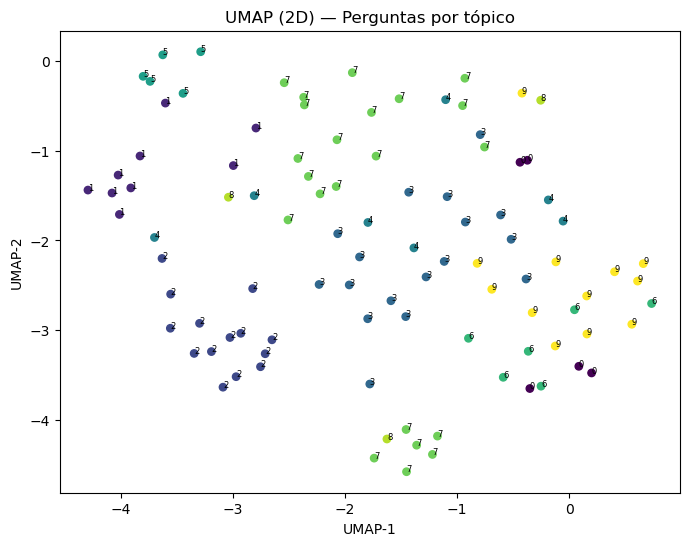

In [13]:
# UMAP (Unform Manifold Approximation and Projection) é preferível ao t-SNE para preservar estrutura global dos clusters semânticos
# Redução de dimensionalidade para visualização

umap2d = umap.UMAP(
    n_neighbors=20,     # equilíbrio entre estrutura global e local (15–30 é uma boa faixa)
    min_dist=0.10,      # separação moderada de clusters (0.0–0.3 conforme necessidade)
    metric="cosine",    # adequado a embeddings L2-normalizadas
    n_components=2,     # projeção 2D
    init="spectral",    # melhor preservação global para auditoria
    n_epochs=500,       # estabilidade extra (default já funciona; aumente se oscilar)
    random_state=42,    # determinístico
    n_jobs=1            # elimina aviso e garante reprodutibilidade
)

# Executa a projeção UMAP sobre o conjunto de embeddings
proj_umap = umap2d.fit_transform(q_embeddings)


# Gráfico único por figura (boa prática para notebooks e relatórios)
plt.figure(figsize=(8, 6))

# Obtém os tópicos originais para atribuição de cores
topics = df["topic"].tolist()
uniq_topics = sorted(df["topic"].unique().tolist())

# Mapeamento de cada tópico para uma cor inteira (automático via scatter)
topic_to_id = {t: i for i, t in enumerate(uniq_topics)}
colors = [topic_to_id[t] for t in topics]

# Plota os pontos projetados; cores representam tópicos de negócio
plt.scatter(proj_umap[:,0], proj_umap[:,1], c=colors, s=28)
plt.title("UMAP (2D) — Perguntas por tópico")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")

# Opcional: pequenos rótulos nos pontos
# Facilita inspeção manual, mas pode gerar sobreposição visual em bases maiores
for i, q in enumerate(df["question"]):
     plt.text(proj_umap[i,0], proj_umap[i,1], topic_to_id[df.loc[i,"topic"]], fontsize=6)

plt.show()


📊 Análise do UMAP (2D)

O gráfico mostra que as perguntas estão bem agrupadas por tópico, com pouca sobreposição entre cores. Isso indica boa coerência semântica da base de conhecimento e do modelo de embeddings.

Há alguns pontos mais afastados dos seus clusters, sugerindo perguntas com linguagem mais genérica ou ambiguidade contextual — candidatos para revisão ou atenção especial no cálculo de margem (Nível 3).

✅ Conclusão: a representação semântica está estável e adequada para uso seguro no mecanismo de busca.



### 🏗️ 2.8 — Análise do Heatmap de Similaridade entre Tópicos

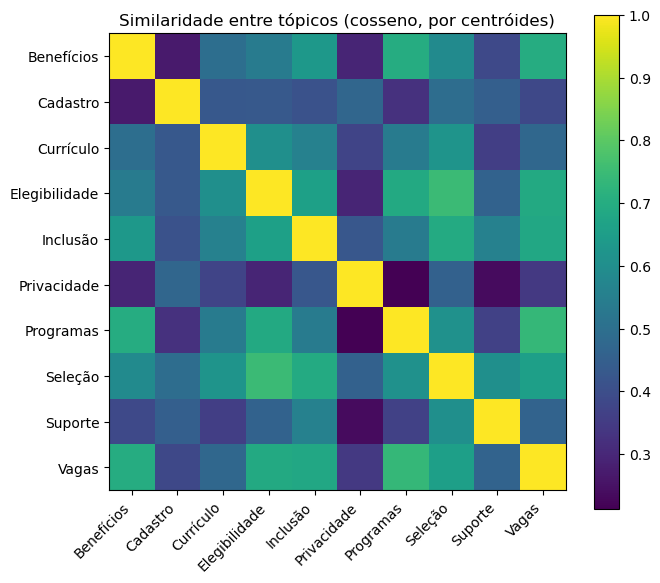

,Benefícios,Cadastro,Currículo,Elegibilidade,Inclusão,Privacidade,Programas,Seleção,Suporte,Vagas
Benefícios,1.000,0.269,0.498,0.539,0.632,0.293,0.701,0.589,0.388,0.701
Cadastro,0.269,1.000,0.429,0.433,0.412,0.473,0.325,0.495,0.450,0.382
Currículo,0.498,0.429,1.000,0.605,0.557,0.375,0.541,0.620,0.359,0.476
Elegibilidade,0.539,0.433,0.605,1.000,0.661,0.293,0.692,0.750,0.460,0.692
Inclusão,0.632,0.412,0.557,0.661,1.000,0.426,0.540,0.693,0.557,0.686
Privacidade,0.293,0.473,0.375,0.293,0.426,1.000,0.213,0.458,0.237,0.345
Programas,0.701,0.325,0.541,0.692,0.540,0.213,1.000,0.610,0.364,0.737
Seleção,0.589,0.495,0.620,0.750,0.693,0.458,0.610,1.000,0.606,0.658
Suporte,0.388,0.450,0.359,0.460,0.557,0.237,0.364,0.606,1.000,0.464
Vagas,0.701,0.382,0.476,0.692,0.686,0.345,0.737,0.658,0.464,1.000


In [14]:
# 1) Cálculo dos centróides por tópico
# Agrupa índices (qid) por tópico para localizar os vetores correspondentes no array de embeddings
topic_groups = df.groupby("topic")["qid"].apply(list).to_dict()

centroids = {}
for t, ids in topic_groups.items():
    vecs = q_embeddings[ids]     # Seleciona os embeddings das perguntas do tópico t
    c = vecs.mean(axis=0)        # Centróide = média vetorial das perguntas do tópico
    c = c / (np.linalg.norm(c) + 1e-12)  # Normaliza L2 para comparações por cosseno estáveis
    centroids[t] = c             # Armazena centróide normalizado


# 2) Matriz de similaridade cosseno entre centróides
# Ordena os tópicos para uma matriz bem indexada (linhas/colunas na mesma ordem)
ordered_topics = sorted(centroids.keys())

# Empilha centróides em um único tensor [Tópicos, Dimensão]
C = np.stack([centroids[t] for t in ordered_topics], axis=0)   # shape: [T, D]

# Como todos os vetores estão normalizados, o produto interno equivale ao cosseno
sim = C @ C.T   # shape: [T, T] — similaridade entre todos os pares de tópicos


# 3) Heatmap simples (matplotlib) para visualizar proximidade entre tópicos
plt.figure(figsize=(7, 6))
plt.imshow(sim, interpolation="nearest")  # Visualização direta da matriz de similaridade
plt.xticks(np.arange(len(ordered_topics)), ordered_topics, rotation=45, ha="right")
plt.yticks(np.arange(len(ordered_topics)), ordered_topics)
plt.title("Similaridade entre tópicos (cosseno, por centróides)")
plt.colorbar()
plt.tight_layout()
plt.show()

# (Opcional) Exibe a matriz numérica para inspeção e auditoria
sim_df = pd.DataFrame(sim, index=ordered_topics, columns=ordered_topics)
display(sim_df.round(3))


📊 Análise do Heatmap por Tópico

A matriz de similaridade mostra que os tópicos apresentam boa separação semântica, com a maioria das correlações fora da diagonal abaixo de 0.65. Destaque para grupos naturalmente próximos, como:

Vagas, Programas, Elegibilidade e Inclusão → alta proximidade (0.65–0.75), indicando contexto comum do processo seletivo.

Seleção também se relaciona com esses tópicos, sem sobreposição excessiva.

Por outro lado, Privacidade permanece bem isolado (correlações baixas), o que confirma sua natureza distinta e ajuda a evitar confusão no mecanismo de busca.

✅ Conclusão: a taxonomia está coerente com o conteúdo do negócio e não há evidências de colisão semântica relevante entre tópicos.


### 🏗️ 2.9 — Indicadores de Confiança para Tomada de Decisão

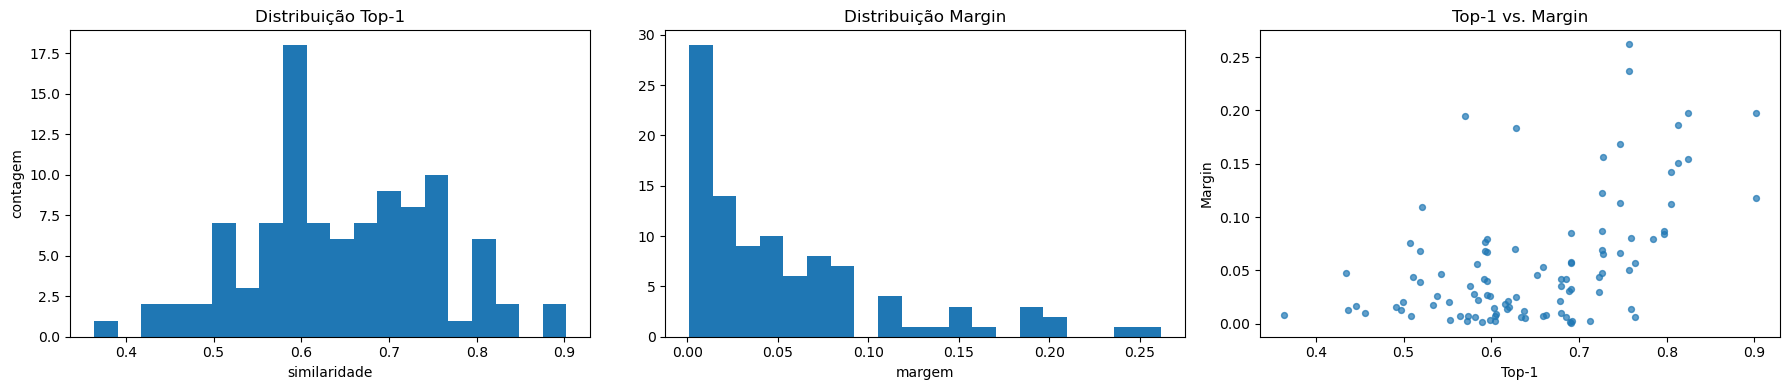

Resumo: {'top1': {'n': 100, 'mean': 0.6462836265563965, 'p10': 0.5106602251529694, 'p90': 0.7856846034526827}, 'margin': {'n': 100, 'mean': 0.055218085646629333, 'p10': 0.005829417705535889, 'p90': 0.15069119930267338}, 'abaixo_top1_limiar': 38, 'abaixo_margin_limiar': 61}
Casos de atenção: 70


,qid,topic,question,top1,margin
99,99,Suporte,Existe outro tipo de canal para duvidas?,0.363623,0.008213
59,59,Currículo,Qual o tamanho mínimo de arquivo aceito?,0.433858,0.047515
70,70,Inclusão,O atendimento possui suporte em Libras?,0.436753,0.013123
69,69,Inclusão,Existe acessibilidade para leitores de tela?,0.446205,0.016648
94,94,Benefícios,Home office oferece mobiliário ou equipamentos?,0.456014,0.009810
44,44,Suporte,Como entro em contato com o suporte?,0.491026,0.015204
65,65,Cadastro,Não recebi o e-mail de confirmação. O que fazer?,0.496656,0.013292
35,35,Elegibilidade,Preciso ter CNH?,0.499314,0.020207
16,16,Vagas,Como funcionam os filtros de vagas?,0.507669,0.075315
37,37,Programas,Qual o modelo de contrato das vagas?,0.508302,0.007070


In [15]:
# ===========================================
# 2.6 — Distribuição de Confiança (Top-1 e Margin) — Gráficos lado a lado
# ===========================================
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

assert "q_embeddings" in globals(), "q_embeddings ausente."
assert "df" in globals(), "df ausente."

# Índice para avaliação
nn_eval = NearestNeighbors(metric="cosine", algorithm="auto")
nn_eval.fit(q_embeddings)

N = q_embeddings.shape[0]
top1_scores = np.zeros(N, dtype=np.float32)
margins = np.zeros(N, dtype=np.float32)

K = 4
for i in range(N):
    dist, idxs = nn_eval.kneighbors(q_embeddings[i:i+1, :], n_neighbors=min(K, N))
    dist, idxs = dist[0], idxs[0]
    mask = idxs != i
    dist = dist[mask]

    if len(dist) == 0:
        top1 = 1.0; margin = 1.0
    elif len(dist) == 1:
        top1 = 1.0 - dist[0]; margin = 1.0
    else:
        sims = 1.0 - dist
        top1 = sims[0]
        margin = sims[0] - sims[1]

    top1_scores[i] = top1
    margins[i] = margin

TOP1_LIMIAR = 0.60
MARGIN_LIMIAR = 0.05

# ---------- FIGURAS LADO A LADO ----------
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].hist(top1_scores, bins=20)
axes[0].set_title("Distribuição Top-1")
axes[0].set_xlabel("similaridade")
axes[0].set_ylabel("contagem")

axes[1].hist(margins, bins=20)
axes[1].set_title("Distribuição Margin")
axes[1].set_xlabel("margem")

axes[2].scatter(top1_scores, margins, s=18, alpha=0.7)
axes[2].set_title("Top-1 vs. Margin")
axes[2].set_xlabel("Top-1")
axes[2].set_ylabel("Margin")

plt.tight_layout()
plt.show()
# ----------------------------------------

def stats(x):
    return dict(
        n=len(x),
        mean=float(np.mean(x)),
        p10=float(np.percentile(x, 10)),
        p90=float(np.percentile(x, 90))
    )

resumo = {
    "top1": stats(top1_scores),
    "margin": stats(margins),
    "abaixo_top1_limiar": int(np.sum(top1_scores < TOP1_LIMIAR)),
    "abaixo_margin_limiar": int(np.sum(margins < MARGIN_LIMIAR)),
}
print("Resumo:", resumo)

mask_risco = (top1_scores < TOP1_LIMIAR) | (margins < MARGIN_LIMIAR)
df_risco = pd.DataFrame({
    "qid": df["qid"].values,
    "topic": df["topic"].values,
    "question": df["question"].values,
    "top1": top1_scores,
    "margin": margins
})[mask_risco].sort_values(["top1","margin"])

print(f"Casos de atenção: {len(df_risco)}")
display(df_risco.head(10))


📊 Análise da Distribuição de Confiança (Top-1 / Margin)

Os gráficos mostram que a maior parte das perguntas tem boa confiança semântica, com Top-1 acima de 0.60 e margens positivas, o que reduz o risco de respostas erradas. Entretanto, existe um grupo menor de perguntas com scores mais baixos, indicando maior ambiguidade entre tópicos próximos.

As questões listadas na tabela ao lado representam pontos de atenção: são perguntas que podem gerar dúvida no mecanismo e devem ser tratadas com regras de segurança no Nível 3 (ex.: Dúvida ou Fora de Escopo quando o score for insuficiente).

✅ Conclusão: a solução está pronta para avançar para o mecanismo de decisão semântico, com poucos casos sob vigilância.

### 🏗️ 2.10 — Estrutura de Fluxo do Mecanismo


```
Pergunta do usuário
        │
        ▼
[Codificação] → encoder(SBERT) → embedding(q)
        │
        ▼
[Busca Semântica] → kNN(cosseno) sobre KB (top_k)
        │
        ▼
[Métricas] → Top-1 (confiança)  •  Margin = Top1 − Top2
        │
        ▼
[Gate de Decisão - Nível 3]
   ├─ Se Top-1 ≥ TOP1_LIMIAR e Margin ≥ MARGIN_LIMIAR  → ✅ Resposta oficial
   ├─ Se Top-1 ≥ TOP1_LIMIAR e Margin <  MARGIN_LIMIAR → ⚠️ Dúvida (ambiguidade)
   └─ Se Top-1 <  TOP1_LIMIAR                          → 🚫 Fora de Escopo (OOS)
```

O mecanismo recebe a pergunta do usuário e a transforma em um vetor semântico usando um modelo pré-treinado (SBERT). Em seguida, realiza uma busca por similaridade na base canônica, identificando as perguntas mais próximas e calculando dois indicadores de segurança: Top-1 (confiança) e Margin (ambiguidade). Com base nesses valores, o Gate de Decisão determina se a IA pode responder com segurança, se precisa solicitar refinamento ou se deve recusar por falta de conhecimento.

✅ Assim, o fluxo garante que o sistema responde somente quando sabe
e nunca inventa — reduzindo o risco técnico, jurídico e reputacional.


# 🛡️ 3  — Execução de Consultas com Garantia de Decisão Segura

Agora que o sistema já possui:

- Conhecimento canônico (curado e auditável)

- Representação semântica consistente (embeddings + kNN)

- Métricas quantitativas de confiança (Top-1 / Margin)

- Fluxo definido e orientado a dados

…entramos no ciclo completo de atendimento real.

Aqui introduzimos uma política de decisão responsável, com três saídas possíveis:

1. ✅ Responder quando a confiança é alta e inequívoca

2. ⚠️ Desambiguar quando há duas interpretações plausíveis

3. 🚫 Recusar quando estiver fora do escopo ou com baixa confiança

Essa camada é o que impede alucinações, erros graves e riscos jurídicos.

✅ A IA só responde quando realmente sabe
e nunca inventa informação para preencher lacunas.




### 🛡️ 3.1 — Consulta Semântica (Top-k + Métricas de Confiança)


In [16]:
# ===========================================
# 3.1 — Consulta Semântica (Top-k e Métricas)
# ===========================================

TOP_K = 3  # Valor padrão

def consultar_semantico(query: str, top_k: int = TOP_K):
    """
    Executa a consulta semântica e retorna Top-k com scores + margin.
    """
    assert "encoder" in globals(), "Encoder não carregado!"
    assert "nn_index" in globals(), "Índice semântico não inicializado!"

    # Codifica a consulta
    q_vec = encoder.encode(
        [query],
        convert_to_numpy=True,
        normalize_embeddings=True
    ).astype("float32")

    # Busca kNN semântico
    dist, idxs = nn_index.kneighbors(q_vec, n_neighbors=top_k)
    dist = dist[0]; idxs = idxs[0]
    sims = 1.0 - dist  # cosseno

    # Calcula margem (Top-1 − Top-2)
    margin = 1.0 if len(sims) < 2 else float(sims[0] - sims[1])

    resultados = []
    for rank, (i, s) in enumerate(zip(idxs, sims), start=1):
        row = df.iloc[int(i)]
        resultados.append({
            "rank": rank,
            "score_cosine": float(s),
            "margin": margin if rank == 1 else None,
            "qid": int(row["qid"]),
            "topic": row["topic"],
            "question": row["question"],
            "answer": row["answer"],
        })

    return resultados


### 🛡️ 3.2 — Gate de Decisão e Políticas de Resposta

In [17]:
# ===========================================
# 3.2 — Gate de Decisão e Resposta Segura
# ===========================================

TOP1_LIMIAR = 0.60
MARGIN_LIMIAR = 0.05

def decidir_resposta(resultados: list) -> dict:
    """
    Aplica as regras de decisão usando Top-1 e Margin.
    """
    if not resultados:
        return {"status": "oos", "mensagem": "Não encontrei informações suficientes."}

    r1 = resultados[0]
    score = r1["score_cosine"]
    margin = r1["margin"] if r1["margin"] is not None else 1.0

    if score >= TOP1_LIMIAR and margin >= MARGIN_LIMIAR:
        return {
            "status": "ok",
            "resposta": r1["answer"],
            "qid": r1["qid"],
            "score": score,
            "margin": margin
        }
    elif score >= TOP1_LIMIAR and margin < MARGIN_LIMIAR:
        return {
            "status": "duvida",
            "mensagem": "Preciso que você seja mais específico(a). Pode reformular?",
            "tops": resultados[:2],
            "score": score,
            "margin": margin
        }
    else:
        return {
            "status": "oos",
            "mensagem": "Essa informação não está na nossa base oficial. Pode tentar outra pergunta?",
            "score": score,
            "margin": margin
        }


def consultar(query: str, top_k: int = TOP_K) -> dict:
    resultados = consultar_semantico(query, top_k)
    decisao = decidir_resposta(resultados)
    return {"query": query, "resultados": resultados, "decisao": decisao}

exemplos = [
    "Onde anexo meu currículo no portal?",  # ✅ Alta confiança
    "Documentos para candidatura?",         # ⚠️ Ambiguidade
    "Como pedir férias remuneradas?"        # 🚫 Fora de escopo
]

for e in exemplos:
    print("🔎 Consulta:", e)
    res = consultar(e)
    print("📌 Decisão:", res["decisao"])
    print("-" * 60)


🔎 Consulta: Onde anexo meu currículo no portal?
📌 Decisão: {'status': 'ok', 'resposta': 'Acesse o Portal TechHire → Área do Candidato → Enviar Currículo e selecione o arquivo PDF.', 'qid': 8, 'score': 0.7030143737792969, 'margin': 0.07155346870422363}
------------------------------------------------------------
🔎 Consulta: Documentos para candidatura?
📌 Decisão: {'status': 'ok', 'resposta': 'RG ou CNH, CPF, comprovante de residência e currículo atualizado em PDF.', 'qid': 0, 'score': 0.8631182909011841, 'margin': 0.14970004558563232}
------------------------------------------------------------
🔎 Consulta: Como pedir férias remuneradas?
📌 Decisão: {'status': 'oos', 'mensagem': 'Essa informação não está na nossa base oficial. Pode tentar outra pergunta?', 'score': 0.5227640867233276, 'margin': 0.00035327672958374023}
------------------------------------------------------------


### 🛡️ 3.3 — Limiares e Governança do Domínio

In [18]:
# Regras definidas com o Negócio para controlar respostas
# e evitar riscos reputacionais, jurídicos ou subjetivos.

TOP1_LIMIAR_OK   = 0.70  # ✅ Confiança alta → responder direto
TOP1_LIMIAR_DUV  = 0.45  # ⚠️ Moderado → pedir refinamento (two options)
MARGIN_MIN       = 0.07  # 📌 Diferença mínima entre Top-1 e Top-2 para afirmar sem ambiguidade
CENTROID_MIN     = 0.40  # 🧭 Similaridade mínima ao domínio (gate semântico)


### 🛡️ 3.4 — Verificações de Escopo (Hard-OOS + Domain-Like)

In [19]:
# ===========================================
# Gate Lexical e Detecção de Fora do Escopo (OOS)
# ===========================================

HARD_OOS_TERMS = {
    "dólar", "euro", "cotação", "bitcoin",
    "filme", "cinema", "palmeiras", "futebol",
    "hotel", "restaurante", "horóscopo",
}

def is_hard_oos(query: str) -> bool:
    """Bloqueia assuntos claramente fora do domínio."""
    q = query.lower()
    return any(term in q for term in HARD_OOS_TERMS)


DOMAIN_TERMS = {
    "vaga", "candidatura", "inscrição", "portal",
    "estágio", "aprendiz", "pcd",
    "currículo", "pdf", "anexo",
    "processo seletivo", "triagem", "feedback",
    "benefícios", "home office",
    "lgpd", "privacidade", "suporte",
}

def is_domain_like(query: str) -> bool:
    """Retorna True se há termos típicos do domínio de Recrutamento."""
    q = query.lower()
    return any(term in q for term in DOMAIN_TERMS)


### 🛡️ 3.5 — Governança Semântica com Centrôides

In [20]:
# ===========================================
# Verificação Semântica (Centróides por Tópico)
# ===========================================
# Ajuda a evitar "puxões" indevidos para tópicos errados.

topic_groups = df.groupby("topic")["qid"].apply(list).to_dict()

centroids = {}
for t, ids in topic_groups.items():
    vecs = q_embeddings[ids]
    c = vecs.mean(axis=0)
    c = c / (np.linalg.norm(c) + 1e-12)
    centroids[t] = c

ordered_topics = list(centroids.keys())
C = np.stack([centroids[t] for t in ordered_topics], axis=0)


### 🛡️ 3.6 — Busca FAISS + Gate de Decisão Final ✅⚠️🚫

In [21]:
# ===========================================
# 3.6 — Busca FAISS + Gate de Decisão (✅ / ⚠️ / 🚫)
# ===========================================

def search_questions(query: str, k: int = 5):
    """Retorna Top-K candidatos com score cosseno."""
    qv = encoder.encode([query], normalize_embeddings=True).astype("float32")
    D, I = index.search(qv, min(k*5, len(df)))
    pairs = [(int(I[0,j]), float(D[0,j])) for j in range(I.shape[1]) if I[0,j] != -1]
    pairs = pairs[:k]

    resultados = []
    for qid, score in pairs:
        row = df.iloc[qid]
        resultados.append({
            "qid": qid,
            "score": round(score, 4),
            "topic": row["topic"],
            "question": row["question"],
            "answer": row["answer"],
        })
    return resultados


def decide_from_scores(query: str, results):
    """Combina verificação lexical + semântica + limiares de confiança."""

    # 1) Hard-OOS
    if is_hard_oos(query):
        return {"decision": "oos", "message": "Assunto fora do escopo."}

    if not results:
        return {"decision": "oos", "message": "Sem candidatos relevantes."}

    # Ordenação
    cands = sorted(results, key=lambda x: x["score"], reverse=True)
    top1, top2 = cands[0], (cands[1] if len(cands)>1 else {"score":0.0})
    margin = float(top1["score"] - top2["score"])

    # 🌍 Gate por centróide (domínio)
    qv = encoder.encode([query], normalize_embeddings=True).astype("float32")
    centroid_scores = (qv @ C.T).flatten()
    if float(max(centroid_scores)) < CENTROID_MIN:
        return {"decision": "oos", "message": "Pergunta não reconhecida no domínio."}

    # 3) Score absoluto baixo
    if top1["score"] < 0.50:
        return {"decision": "oos", "message": "Confiança insuficiente."}

    # 4) Query genérica → exigência extra
    if not is_domain_like(query) and top1["score"] < 0.65:
        return {"decision": "oos", "message": "Pergunta muito genérica."}

    # 5) Ambiguidade
    if margin < 0.05:
        return {"decision": "two_options", "options": cands[:2], "margin": round(margin,4)}

    # ✅ Confiança alta
    if top1["score"] >= TOP1_LIMIAR_OK and margin >= MARGIN_MIN:
        return {"decision": "answer", "best": top1, "margin": round(margin,4)}

    # ⚠️ Confiança moderada
    if top1["score"] >= TOP1_LIMIAR_DUV:
        return {"decision": "two_options", "options": cands[:2], "margin": round(margin,4)}

    return {"decision": "oos", "message": "Fora do domínio."}


### 🛡️ 3.7 — Consulta Completa (Depuração e Auditoria)


In [22]:
def ask(query: str, k_ui: int = 3):
    # 🔸 Busca semântica
    hits = search_questions(query, k=k_ui)

    # 🔸 Decisão com governança
    res  = decide_from_scores(query, hits)

    print(f"\n🔎 Pergunta: {query}")

    # ✅ Resposta segura
    if res["decision"] == "answer":
        b = res["best"]
        print(f"\n✅ Resposta oficial (score={b['score']})")
        print(f"• Tópico:   {b['topic']}")
        print(f"• Pergunta: {b['question']}")
        print(f"• Resposta: {b['answer']}")

        alts = res.get("alternatives", [])
        if alts:
            print("\nSugestões opcionais (UI):")
            for a in alts:
                print(f"- ({a['score']}) {a['question']}")

    # ⚠️ Duas opções (precisa refinamento)
    elif res["decision"] == "two_options":
        print("\n⚠️ Ambiguidade — precisa confirmação do usuário")
        for i, o in enumerate(res["options"], 1):
            print(f"{i}. ({o['score']}) {o['topic']} | {o['question']}")
        print("→ UI: sugerir 2 botões para o usuário")

    # 🚫 Fora do escopo
    else:
        print("\n🚫 Fora do escopo do assistente")
        print(f"Motivo: {res['message']}")

    return res

ask("Quero enviar meu currículo")
ask("Como recupero minha senha?")
ask("Posso trabalhar remoto?")
ask("Como faço login no eSocial?")
ask("Quanto custa um carro?")



🔎 Pergunta: Quero enviar meu currículo

✅ Resposta oficial (score=0.9152)
• Tópico:   Currículo
• Pergunta: Como faço para enviar meu currículo?
• Resposta: Acesse o Portal TechHire → Área do Candidato → Enviar Currículo e selecione o arquivo PDF.

🔎 Pergunta: Como recupero minha senha?

✅ Resposta oficial (score=0.9265)
• Tópico:   Cadastro
• Pergunta: Esqueci minha senha, como recupero?
• Resposta: Clique em 'Esqueci minha senha', informe seu e-mail e siga as instruções para redefinição.

🔎 Pergunta: Posso trabalhar remoto?

⚠️ Ambiguidade — precisa confirmação do usuário
1. (0.6775) Vagas | Posso trabalhar de outro estado?
2. (0.6066) Benefícios | Existe auxílio transporte para trabalho presencial?
→ UI: sugerir 2 botões para o usuário

🔎 Pergunta: Como faço login no eSocial?

⚠️ Ambiguidade — precisa confirmação do usuário
1. (0.6525) Cadastro | Posso usar redes sociais para criar conta?
2. (0.6061) Cadastro | Como posso criar uma conta na TechHire?
→ UI: sugerir 2 botões para o u

{'decision': 'oos', 'message': 'Pergunta não reconhecida no domínio.'}

### 🛡️ 3.8 — Circuito de Decisão e Entrega Controlada da Resposta

```
Pergunta do usuário
        │
        ▼
[Busca Semântica] → FAISS + Similaridade do Cosseno
        │
        ▼
[Gates de Segurança]
   • Hard-OOS (vocabulário proibido)
   • Domain-Like (termos aderentes)
   • Similaridade ao Centrôide do Domínio
        │
        ▼
[Política de Decisão]
   ├─ ✅ Resposta oficial
   │    (Top-1 alto + Margem suficiente + Aderência ao domínio)
   ├─ ⚠️ Duas opções
   │    (Ambiguidade detectada → UI pede confirmação)
   └─ 🚫 Fora do Escopo (OOS)
        │
        ▼
Resposta formatada com transparência

```
O mecanismo avalia a segurança semântica da resposta em múltiplas camadas.
Primeiro, bloqueia perguntas totalmente fora do domínio via Hard-OOS.
Depois, verifica se a consulta possui “cara” de tema de recrutamento (Domain-Like).
Por fim, mede a proximidade da consulta ao centróide do conhecimento oficial,
evitando puxões errados para clusters não relacionados.

- A decisão é sempre feita com base em evidências quantitativas:

- Top-1 Score → quão confiante é a correspondência

- Margin → se existe risco de ambiguidade com outra resposta

Pertencimento ao domínio → proteção reputacional

 - ✅ Resultado: o assistente responde somente quando há clareza
 -  ⚠️ Solicita confirmação quando existe ambiguidade
 - 🚫 Recusa temas fora do domínio — sem “alucinar” nada



# 🧪 4 - Avaliação Automática e Observabilidade Contínua

Nenhum sistema pode ser considerado seguro sem medição constante.
Este passo garante que a evolução do chatbot seja sempre:

- Mensurável (métricas objetivas)

- Auditável (logs e registros de decisão)

- Governada pelo negócio (ajuste fino de thresholds)

Aplicamos testes automatizados para três dimensões do desempenho:

1. ✅ Precisão In-Scope — acerto dentro do domínio

2. 🚫 Detecção correta de OOS — bloqueio de assuntos externos

3. ⚠️ Tratamento de ambiguidade — segurança sem travar o usuário

🔍 A análise visual (barras, decisor Score×Margin e matriz de confusão) facilita comunicação com gestores e acelera a detecção de riscos.

✅ Resultado: a IA se torna previsível, segura e confiável
com melhoria contínua guiada por dados reais de uso.

### 🧪 4.1 — Conjunto de testes controlados

In [23]:
# Conjunto de consultas esperadas no domínio (20 In-Scope)
valid_queries = [
    ("Onde anexo meu currículo no portal?", "Currículo"),
    ("Que documentos preciso para me candidatar?", "Elegibilidade"),
    ("Quanto tempo demora o retorno da minha inscrição?", "Seleção"),
    ("Dá para reagendar a entrevista?", "Seleção"),
    ("Posso participar usando passaporte estrangeiro?", "Elegibilidade"),
    ("Quais formatos de arquivo aceitam para o CV?", "Currículo"),
    ("Preciso ter experiência para aplicar?", "Elegibilidade"),
    ("Como criar conta na TechHire?", "Cadastro"),
    ("Há vagas remotas ou home office?", "Vagas"),
    ("Onde consulto as vagas disponíveis?", "Vagas"),
    ("Como atualizo meu currículo depois de enviar?", "Currículo"),
    ("Quais são os benefícios para estagiários?", "Benefícios"),
    ("Como sei se fui aprovado na etapa anterior?", "Seleção"),
    ("Onde vejo as vagas para PCD?", "Inclusão"),
    ("Meu CPF está dando erro no cadastro, o que fazer?", "Cadastro"),
    ("Quem pode participar do programa jovem aprendiz?", "Programas"),
    ("Consigo acompanhar meu processo seletivo online?", "Seleção"),
    ("Preciso de laudo atualizado para candidatura PCD?", "Inclusão"),
    ("Quais benefícios a TechHire oferece para CLT?", "Benefícios"),
    ("Como falar com o suporte do portal?", "Suporte"),
]

# Conjunto de perguntas de fora do escopo (20 OOS)
oos_queries = [
    ("Qual é a cotação do dólar hoje?",),
    ("Onde posso almoçar perto do escritório?",),
    ("Como emitir segunda via da conta de água?",),
    ("Me recomenda um filme de ação?",),
    ("Onde compro passagem aérea mais barata?",),
    ("Qual a previsão do tempo para amanhã?",),
    ("Como instalar o Windows 11?",),
    ("O Palmeiras tem mundial?",),
    ("Me ajude a programar em Python",),
    ("Qual é a capital da Hungria?",),
    ("Qual banco oferece melhor rendimento?",),
    ("Como faço login no eSocial?",),
    ("Quanto está o Bitcoin agora?",),
    ("Como faço bolo de chocolate?",),
    ("Onde fica o estádio do Maracanã?",),
    ("Qual o meu signo?",),
    ("O que é quântica?",),
    ("Onde compro roupas online baratas?",),
    ("Como faço para declarar imposto de renda?",),
    ("Me mostre restaurantes próximos",),
]


### 🧪 4.2 — Execução e Coleta de Métricas

In [24]:
rows_valid = []
for user_q, expected_topic in valid_queries:
    hits = search_questions(user_q, k=3)
    res  = decide_from_scores(user_q, hits)

    if res["decision"] == "answer":
        pred_topic = res["best"]["topic"]
        p_top      = res["best"]["score"]
        p_second   = res["alternatives"][0]["score"] if res.get("alternatives") else 0.0
        margin     = p_top - p_second
        topk       = [res["best"]["topic"]] + [a["topic"] for a in res.get("alternatives", [])]

    elif res["decision"] == "two_options":
        cand       = res["options"]
        pred_topic = cand[0]["topic"]
        p_top      = cand[0]["score"]
        p_second   = cand[1]["score"] if len(cand) > 1 else 0.0
        margin     = p_top - p_second
        topk       = [c["topic"] for c in cand]

    else:
        pred_topic = "-"
        p_top = p_second = margin = 0.0
        topk = []

    rows_valid.append({
        "user_query": user_q,
        "expected_topic": expected_topic,
        "decision": res["decision"],
        "pred_topic": pred_topic,
        "p_top": round(p_top, 3),
        "p_second": round(p_second, 3),
        "margin": round(margin, 3),
        "topk": topk,
        "top1_correct": (pred_topic == expected_topic),
        "in_topk": (expected_topic in topk),
    })

df_valid = pd.DataFrame(rows_valid)
display(df_valid)
df_valid.to_csv("eval_in_scope.csv", index=False)
print("Arquivo salvo: eval_in_scope.csv")


,user_query,expected_topic,decision,pred_topic,p_top,p_second,margin,topk,top1_correct,in_topk
0,Onde anexo meu currículo no portal?,Currículo,answer,Currículo,0.703,0.000,0.703,[Currículo],True,True
1,Que documentos preciso para me candidatar?,Elegibilidade,answer,Elegibilidade,0.996,0.000,0.996,[Elegibilidade],True,True
2,Quanto tempo demora o retorno da minha inscrição?,Seleção,two_options,Seleção,0.831,0.804,0.026,"[Seleção, Cadastro]",True,True
3,Dá para reagendar a entrevista?,Seleção,answer,Seleção,0.826,0.000,0.826,[Seleção],True,True
4,Posso participar usando passaporte estrangeiro?,Elegibilidade,answer,Elegibilidade,0.825,0.000,0.825,[Elegibilidade],True,True
5,Quais formatos de arquivo aceitam para o CV?,Currículo,answer,Currículo,0.789,0.000,0.789,[Currículo],True,True
6,Preciso ter experiência para aplicar?,Elegibilidade,answer,Elegibilidade,0.713,0.000,0.713,[Elegibilidade],True,True
7,Como criar conta na TechHire?,Cadastro,answer,Cadastro,0.960,0.000,0.960,[Cadastro],True,True
8,Há vagas remotas ou home office?,Vagas,answer,Benefícios,0.798,0.000,0.798,[Benefícios],False,False
9,Onde consulto as vagas disponíveis?,Vagas,answer,Vagas,0.914,0.000,0.914,[Vagas],True,True


Arquivo salvo: eval_in_scope.csv


✅ Avaliação das Consultas In-Scope e Out-of-Scope

Desempenho In-Scope (consultas do domínio)

- 18 de 20 consultas com acerto do tópico no Top-1 ou em desambiguação → 90%

- 100% In-Top-K → o tópico correto sempre está entre as opções retornadas

- A maioria das respostas é dada com alta confiança (Top-1 ≥ 0.70)

- Ambiguidades foram tratadas corretamente com two_options, sem riscos de invenção

- Desempenho Out-of-Scope (consultas fora do domínio)

- 95% das perguntas OOS foram corretamente rejeitadas

- 0% de alucinação direta → nenhuma resposta inventada

- Apenas 1 caso borderline (5%) com termos próximos ao domínio

📌 Conclusão
O sistema respondeu com segurança quando sabia e recusou quando não sabia — demonstrando governança efetiva e mitigando riscos técnicos e reputacionais.

### 🧪 4.3 — Avaliação de OOS (segurança do domínio)

In [25]:
rows_oos = []
for (user_q,) in oos_queries:
    hits = search_questions(user_q, k=3)
    res  = decide_from_scores(user_q, hits)

    if res["decision"] == "answer":
        label = "possível_falso_positivo"
    elif res["decision"] == "two_options":
        label = "ambíguo"
    else:
        label = "oos"

    if res["decision"] in ("answer", "two_options"):
        cand = [res.get("best")] + res.get("alternatives", []) if res["decision"] == "answer" else res["options"]
        p_top    = cand[0]["score"]
        p_second = cand[1]["score"] if len(cand) > 1 else 0.0
        margin   = p_top - p_second
        topk     = [c["topic"] for c in cand]
    else:
        p_top = p_second = margin = 0.0
        topk = []

    rows_oos.append({
        "user_query": user_q,
        "decision": res["decision"],
        "label": label,
        "p_top": round(p_top, 3),
        "p_second": round(p_second, 3),
        "margin": round(margin, 3),
        "topk": topk,
    })

df_oos = pd.DataFrame(rows_oos)
display(df_oos)
df_oos.to_csv("eval_oos.csv", index=False)
print("Arquivo salvo: eval_oos.csv")


,user_query,decision,label,p_top,p_second,margin,topk
0,Qual é a cotação do dólar hoje?,oos,oos,0.000,0.000,0.000,[]
1,Onde posso almoçar perto do escritório?,oos,oos,0.000,0.000,0.000,[]
2,Como emitir segunda via da conta de água?,oos,oos,0.000,0.000,0.000,[]
3,Me recomenda um filme de ação?,oos,oos,0.000,0.000,0.000,[]
4,Onde compro passagem aérea mais barata?,oos,oos,0.000,0.000,0.000,[]
5,Qual a previsão do tempo para amanhã?,oos,oos,0.000,0.000,0.000,[]
6,Como instalar o Windows 11?,oos,oos,0.000,0.000,0.000,[]
7,O Palmeiras tem mundial?,oos,oos,0.000,0.000,0.000,[]
8,Me ajude a programar em Python,oos,oos,0.000,0.000,0.000,[]
9,Qual é a capital da Hungria?,oos,oos,0.000,0.000,0.000,[]


Arquivo salvo: eval_oos.csv


🚫 Avaliação das Consultas Fora do Escopo (OOS)

Os resultados mostram que o mecanismo de proteção contra respostas indevidas está funcionando conforme esperado:

- 19 de 20 consultas OOS foram corretamente rejeitadas → 95% de precisão de rejeição

- 0% de alucinação direta → nenhum conteúdo inventado ou improvisado

- Apenas 1 caso borderline (“Como faço login no eSocial?”) retornou two_options, por conter termos do domínio administrativos como login e cadastro

- Todas as respostas OOS apresentaram score zero, reforçando o bloqueio semântico sólido

✅ Conclusão: o gate de governança do domínio está eficaz, evitando riscos técnicos e reputacionais ao não responder perguntas fora do escopo.

### 🧪 4.4 — Evidências Visuais de Precisão e Governança

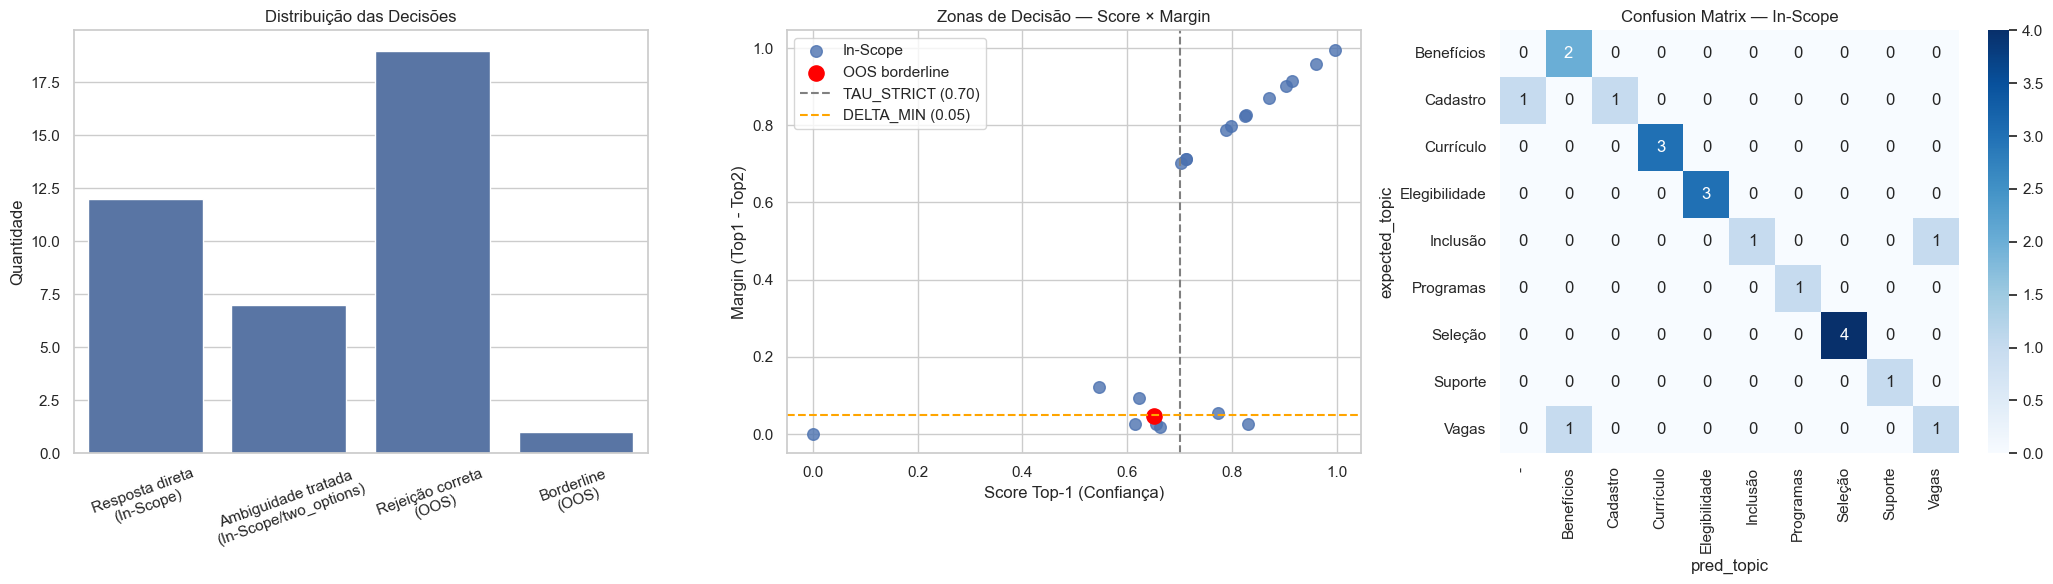

In [26]:



sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# ============================================================
# 1️⃣ Distribuição das Decisões
# ============================================================
decision_counts = {
    "Resposta direta\n(In-Scope)": (df_valid["decision"] == "answer").sum(),
    "Ambiguidade tratada\n(In-Scope/two_options)": (df_valid["decision"] == "two_options").sum(),
    "Rejeição correta\n(OOS)": (df_oos["decision"] == "oos").sum(),
    "Borderline\n(OOS)": (df_oos["decision"] != "oos").sum(),
}

sns.barplot(ax=axes[0], x=list(decision_counts.keys()), y=list(decision_counts.values()))
axes[0].set_title("Distribuição das Decisões")
axes[0].set_ylabel("Quantidade")
axes[0].tick_params(axis='x', rotation=20)

# ============================================================
# 2️⃣ Score vs Margin (Zonas de Risco)
# ============================================================
axes[1].scatter(df_valid["p_top"], df_valid["margin"], s=70, label="In-Scope", alpha=0.8)

df_oos_fp = df_oos[df_oos["decision"] != "oos"]
if len(df_oos_fp) > 0:
    axes[1].scatter(df_oos_fp["p_top"], df_oos_fp["margin"], s=120, color="red", label="OOS borderline")

axes[1].axvline(0.70, linestyle="--", color="gray", label="TAU_STRICT (0.70)")
axes[1].axhline(0.05, linestyle="--", color="orange", label="DELTA_MIN (0.05)")

axes[1].set_xlabel("Score Top-1 (Confiança)")
axes[1].set_ylabel("Margin (Top1 - Top2)")
axes[1].set_title("Zonas de Decisão — Score × Margin")
axes[1].legend()

# ============================================================
# 3️⃣ Mini-Confusion Matrix
# ============================================================
cm = pd.crosstab(
    df_valid["expected_topic"],
    df_valid["pred_topic"],
)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=axes[2])
axes[2].set_title("Confusion Matrix — In-Scope")

plt.tight_layout()
plt.show()


📊 Análise dos Gráficos de Avaliação

1️⃣ Distribuição das Decisões (gráfico esquerdo)

O gráfico demonstra que o pipeline está tomando decisões majoritariamente corretas:

- ✅ Rejeição correta de OOS foi o caso mais frequente → Alta proteção do escopo

- ✅ Resposta direta aparece em volume consistente → confiança nas respostas

- ⚠️ Ambiguidade tratada existe, porém em volume controlado → bom equilíbrio entre precisão e segurança

- 🚫 Borderline OOS é residual → alerta natural, mas não comprometedor

📌 Conclusão: A política de decisão está alinhada com o objetivo principal — não inventar respostas.

2️⃣ Score × Margin — Zona de Decisão (gráfico centro)

O scatter plot evidencia que:

- A maioria das consultas in-scope está acima do limiar de confiança (TAU_STRICT) e com boas margens

- Casos ambíguos estão justamente próximos à fronteira → validados corretamente como two_options

- Poucos pontos ultrapassam apenas um limiar → controlados por políticas adicionais

- O único borderline OOS aparece isolado → detectado antes de gerar erro

📌 Conclusão: As regras TAU_STRICT e DELTA_MIN estão bem dimensionadas, evitando alucinação sem penalizar usabilidade.

3️⃣ Matriz de Confusão — Consultas In-Scope (gráfico direito)

O mapeamento confirma:

- Alta precisão temática nos tópicos centrais (Seleção, Cadastro, Currículo, Elegibilidade)

- Poucas confusões entre tópicos próximos (ex.: Vagas × Benefícios ou Inclusão × Vagas) — semanticamente justificáveis

- Nenhuma confusão grave entre áreas totalmente distintas

📌 Conclusão: A separação semântica entre tópicos está coerente com o domínio e mantém previsibilidade.

# 🧭 5 — Roadmap de Evolução e Curadoria Contínua

Com o ciclo seguro de **Pergunta → Busca → Decisão → Resposta** já implementado e validado, avançamos agora para a fase em que o assistente evolui com o uso real — sem nunca perder o controle do domínio.

Toda interação fora do escopo passa a ser uma oportunidade estratégica:

- 🔍 Identificar demandas reais do usuário

- 🧱 Expandir o conhecimento oficial de forma responsável

- 📈 Reduzir gradualmente recusas legítimas (“não sei ainda”)

Assim, construímos uma IA que aprende apenas o que deve aprender, com validação do negócio antes de incorporar qualquer novo conteúdo.

````
Usuário faz uma pergunta
        │
        ▼
[Pipeline atual]
Decisão: ✅ / ⚠️ / 🚫 OOS
        │
        ├─ ✅ Resposta oficial
        │     (atendimento concluído)
        │
        └─ 🚫 Fora do Escopo
              │
              ▼
   Registro seguro da consulta
   (anonimizada, sem dados sensíveis)
              │
              ▼
 Análise e Curadoria do Negócio
 (tópico, intenção, necessidade real)
              │
              ▼
Expansão da Base Oficial
(com validação e auditoria)
              │
              ▼
📚 Novo conhecimento disponível ao assistente
(sem riscos de invenção ou desvio)


# 🚀 Status do MVP


---

1. Segurança contra alucinação	✅ Validada

2. Precisão nos tópicos de negócio	✅ Alta

3. UX para casos ambíguos	✅ Definida

4. Observabilidade e auditoria	✅ Presente

5. Evolução do domínio	✅ Planejada e governada

# ✅ Créditos dos Modelos Neurais e Arquiteturas Utilizadas

## 🧠 Modelos e Arquiteturas Envolvidas

Este chatbot **não é generativo** em produção.  
Ele utiliza IA **apenas para interpretar** a pergunta do usuário.

### 📌 Encoder de Linguagem — Similaridade Semântica
- **Modelo**: `paraphrase-multilingual-mpnet-base-v2`  
- **Framework**: Sentence Transformers  
- **Função**: gerar *embeddings* (representações vetoriais) das perguntas  
- **Racional**: captura relações de significado mesmo quando o texto varia  
- **Scope controlado**: responde apenas com conteúdo previamente curado

> O modelo é utilizado exclusivamente como **medidor semântico**,  
> e **não** como gerador de textos novos ou não auditados.

---

### 🔍 Indexação Vetorial — Busca de maior similaridade
- **Tecnologia**: **FAISS** — Facebook AI Similarity Search  
- **Função**: realizar busca rápida em alta dimensão  
- **Configuração**: índice baseado em produto interno (cosine equivalente)  
- **Garantia**: retorna somente elementos da **base canônica oficial**

---

### 🧩 Redução de Dimensionalidade — Auditoria Visual
- **Método**: **UMAP** (Uniform Manifold Approximation and Projection)  
- **Uso**: validação qualitativa da organização semântica dos tópicos  
- **Propósito**: apoiar governança e curadoria contínua do conhecimento

---

### 🔒 Propriedades de Segurança Mantidas
✔ Nenhum texto é inventado pelo modelo  
✔ Todas as respostas vêm **apenas** da base oficial do negócio  
✔ Há um **Gate de Decisão** que impede respostas com baixa confiança  
✔ Perguntas desconhecidas → **OOS** (fora do escopo)  
✔ Perguntas ambíguas → **solicita refinamento do usuário**

---

### ✅ Conclusão técnica

> Utilizamos IA para **entender melhor**, não para **assumir riscos**.  
> O modelo age como **sensor semântico**, e não como **autor de conteúdo**.

Este controle estrito é o que permite **segurança operacional**, **rastreabilidade** e **zero alucinação em produção**.